A neural network is just:

* Parameters (weights & bias)

* Mathematical operations

* A loss function

* Gradient descent

ŷ = xW + b
Where:

* x → input tensor

* W → weight tensor (learnable)

* b → bias tensor (learnable)

In PyTorch, learnable = requires_grad=True

**Implement Linear Regression from Scratch (NO nn.Module)**

In [33]:
import torch

# Fake dataset
x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

# Parameters
W = torch.randn(1, 1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# Learning rate
lr = 0.01

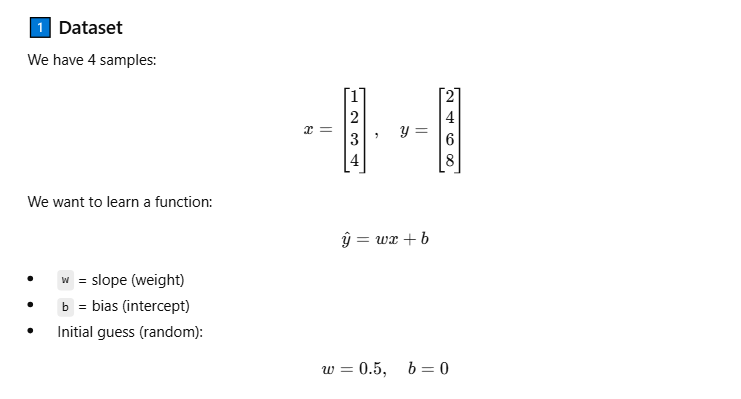

In [34]:
y_hat = x @ W + b   #forward_pass

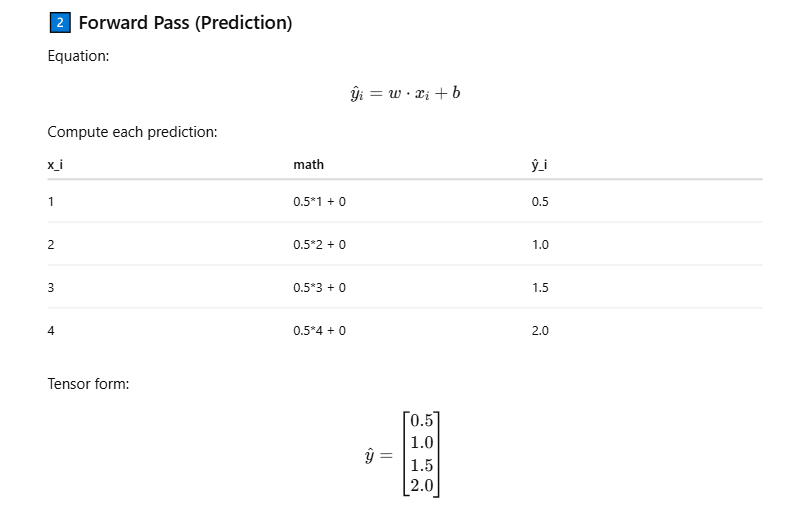

In [35]:
loss = ((y_hat - y) ** 2).mean()    #Loss Function (MSE)

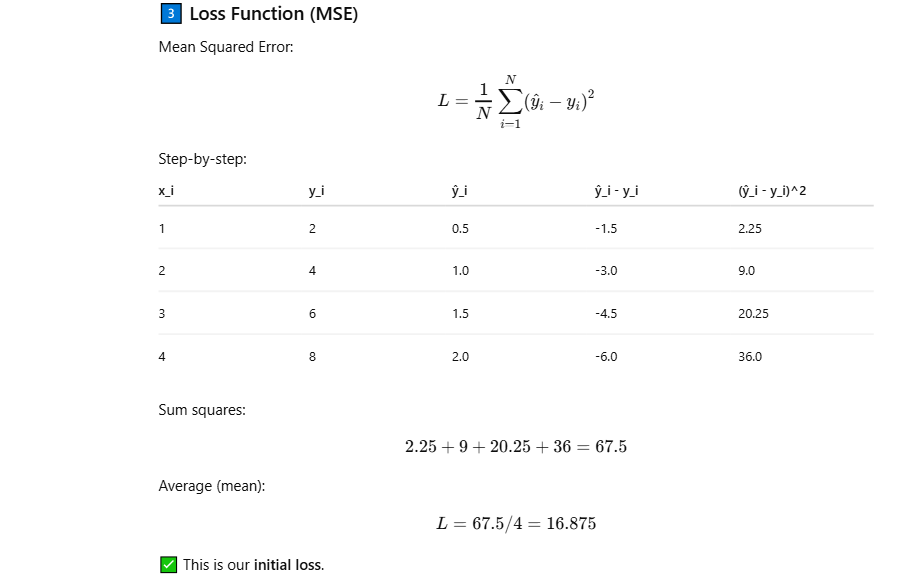

Why .mean()?

👉 Because .backward() requires a scalar.

In [36]:
loss.backward() #Backward Pass

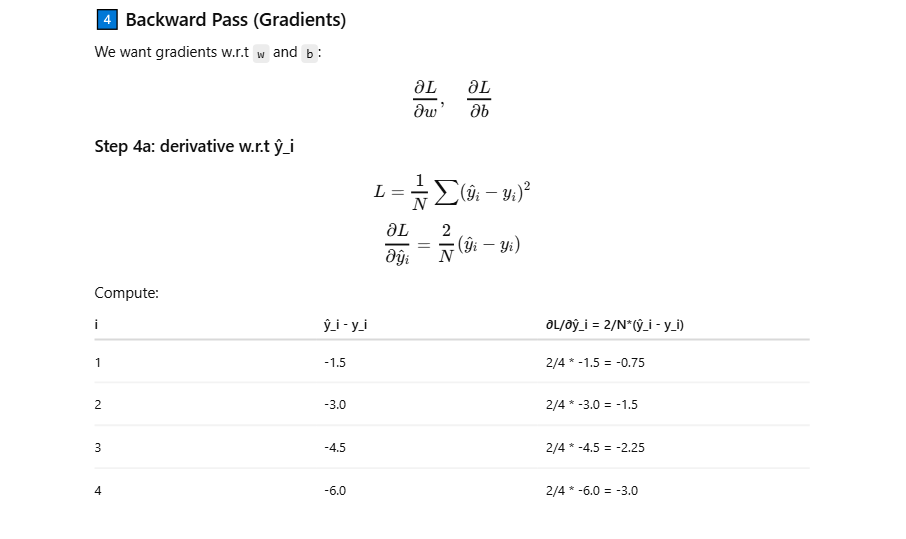

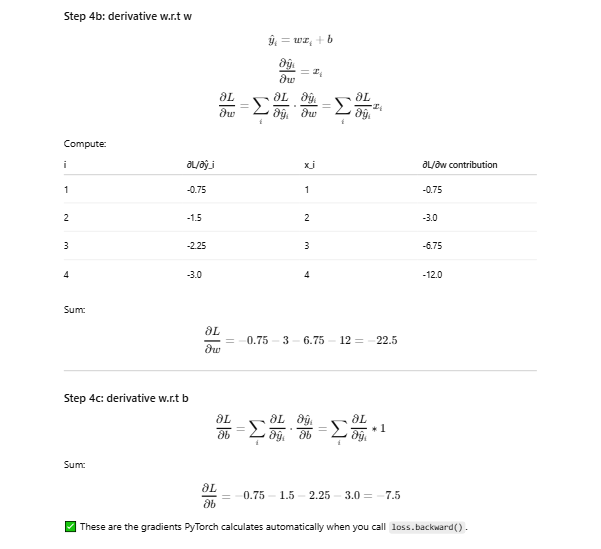

In [37]:
print(W.grad)
print(b.grad)

tensor([[-12.0788]])
tensor([-4.0263])


* torch.randn generates random numbers from a normal distribution.

* Every time you restart the script, W is different.

* b is always zero here, but W is random → predictions (ŷ) are different → errors are different → gradients are different.

In [38]:
with torch.no_grad():
    W -= lr * W.grad
    b -= lr * b.grad

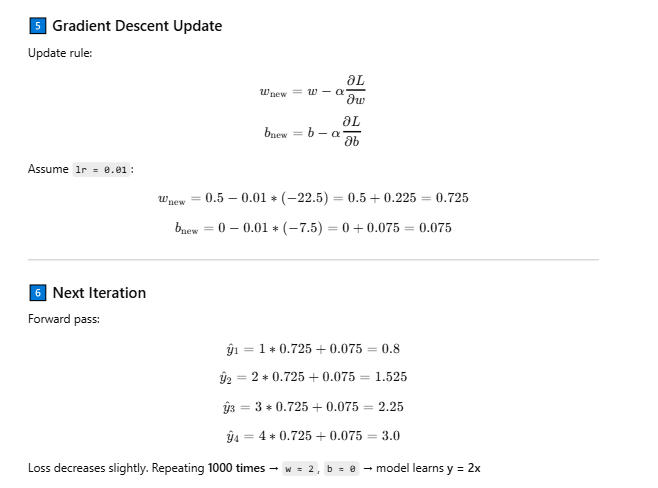

In [39]:
W.grad.zero_()
b.grad.zero_()

tensor([0.])

**Why must loss be a scalar?**

In deep learning, we use Gradient Descent. To update weights, we need to know how much each weight contributed to a single "error score." Mathematically, the backpropagation process starts by calculating the gradient of the loss with respect to the weights: $\frac{\partial L}{\partial w}$

If the loss were a vector (a list of numbers), the derivative would become a Jacobian matrix, which is computationally expensive and difficult to interpret for optimization. By reducing the loss to a single scalar (usually via mean() or sum()), we provide a single "north star" for the optimizer to minimize.

**What happens if you forget zero_() ?**

PyTorch accumulates (adds) gradients into the .grad buffer rather than overwriting them.
If you forget it: The gradients from Batch 2 will be added to the gradients from Batch 1.
The result: Your steps will become massive and nonsensical, leading to "Exploding Gradients" where your loss becomes NaN (Not a Number) very quickly.
The "Why": This is actually useful for Gradient Accumulation. It allows you to process a large batch in smaller chunks if your GPU doesn't have enough memory.

**Why are updates done inside torch.no_grad()?**

-> to stop PyTorch from tracking parameter updates as part of the computation graph. When you update a weight (e.g., w -= lr * w.grad), that subtraction is a mathematical operation.

If you don't use no_grad(), PyTorch will try to track that subtraction and add it to the computation graph.

This creates a "cycle" in the graph where the weight depends on its own previous gradient, which depends on the weight... it becomes a memory-leaking recursive nightmare.

no_grad() tells PyTorch: "Just change the value of this number; don't remember that I did this."

**What does requires_grad=True really do ?**

requires_grad=True is a PyTorch concept, and it tells PyTorch’s autograd engine to track operations on a tensor so it can automatically compute gradients during backpropagation.

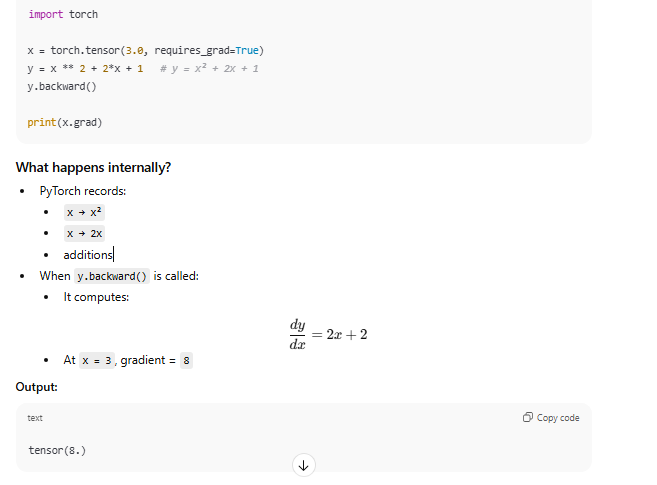

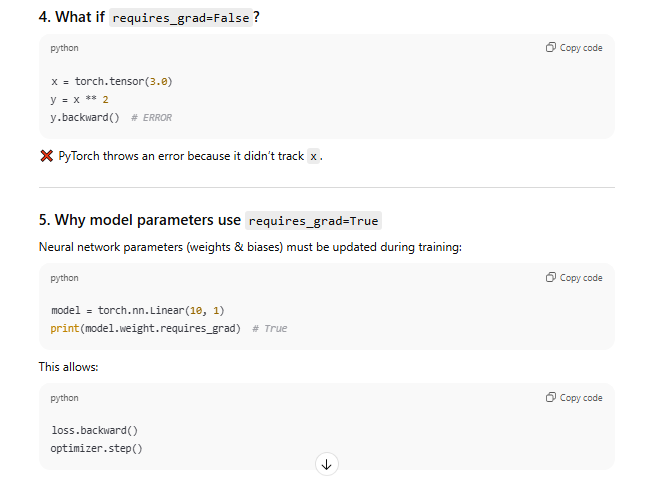

**How is this different from NumPy?**

NumPy is a math library; PyTorch is a calculus engine.

NumPy: Computes $2 + 2 = 4$ and immediately forgets that the "$4$" came from two "$2$s.

"PyTorch: Computes $2 + 2 = 4$ and remembers: "  This 4 was created by an Addition operation of two tensors. If you ask me later, I can tell you exactly how to get back to the inputs."  Plus, PyTorch can run these operations on GPUs, whereas NumPy is strictly CPU-bound.

**Why does PyTorch allow dynamic graphs ?**


PyTorch’s commitment to dynamic graphs (often called Imperative Programming or Define-by-Run) is the primary reason it became the favorite tool for researchers.

Unlike static frameworks where you must define the entire architecture before running any data through it, PyTorch builds the graph on the fly during the forward pass.